# EDA PI_ML_OPS * DATAFT12 * BEATRIZ CAROLINA LOPEZ AMADO

In [24]:
# IMPORTO LIBRERIAS

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


In [25]:
# IMPORTO LOS DATOS
# CREO UNA VARIABLE CON EL NOMBRE Data_recomendación PARA LEER EL DATAFRAME QUE TRANSFORME Y LIMPIE
# ESTE DATAFRAME LO CREE EN EL ARCHIVO DE ETL CAROLINA.ipynb
Data_recomendación = pd.read_csv('./Data_recomendación_peliculas_plataformas_de_streaming.csv')


C:\Users\bety2022\AppData\Local\Temp\ipykernel_10844\1313263917.py:4: DtypeWarning: Columns (5,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_recomendación = pd.read_csv('./Data_recomendación_peliculas_plataformas_de_streaming.csv')


# Visualizamos los datos 

In [26]:
print(Data_recomendación.shape)
Data_recomendación.head(5)

(45476, 34)


,Unnamed: 0,id,character,name_actor,genres_actor,434,departament,job,name_director,budget,...,id_genres,name_genres,name_production,id_production,iso_countrie,name_countrie,iso_languague,name_languague,release_year,return
0,0,862,"Woody (voice),Buzz Lightyear (voice),Mr. Potat...","Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...","2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,2.0,1....",NaN,"Directing,Writing,Writing,Writing,Writing,Prod...",DirectorScreenplayScreenplayScreenplayScreenpl...,"John Lasseter,Joss Whedon,Andrew Stanton,Joel ...",30000000.0,...,"16.0,35.0,10751.0","Animation,Comedy,Family",Pixar Animation Studios,3.0,US,United States of America,en,English,1995.0,12.451801
1,1,8844,"Alan Parrish,Samuel Alan Parrish / Van Pelt,Ju...","Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...","2.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,1....",NaN,"Production,Writing,Sound,Directing,Editing,Pro...",Executive ProducerScreenplayOriginal Music Com...,"Larry J. Franco,Jonathan Hensleigh,James Horne...",65000000.0,...,"12.0,14.0,10751.0","Adventure,Fantasy,Family","TriStar Pictures,Teitler Film,Interscope Commu...","559.0,2550.0,10201.0",US,United States of America,"en,fr","English,Français",1995.0,4.043035
2,2,15602,"Max Goldman,John Gustafson,Ariel Gustafson,Mar...","Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...","2.0,2.0,1.0,1.0,1.0,2.0,2.0",NaN,"Directing,Writing,Writing,Crew",DirectorCharactersWriterSound Recordist,"Howard Deutch,Mark Steven Johnson,Mark Steven ...",0.0,...,"10749.0,35.0","Romance,Comedy","Warner Bros.,Lancaster Gate","6194.0,19464.0",US,United States of America,en,English,1995.0,0.000000
3,3,31357,"Savannah 'Vannah' Jackson,Bernadine 'Bernie' H...","Whitney Houston,Angela Bassett,Loretta Devine,...","1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0",NaN,"Directing,Writing,Production,Production,Produc...",DirectorScreenplayProducerProducerProducerScre...,"Forest Whitaker,Ronald Bass,Ronald Bass,Ezra S...",16000000.0,...,"35.0,18.0,10749.0","Comedy,Drama,Romance",Twentieth Century Fox Film Corporation,306.0,US,United States of America,en,English,1995.0,5.090760
4,4,11862,"George Banks,Nina Banks,Franck Eggelhoffer,Ann...","Steve Martin,Diane Keaton,Martin Short,Kimberl...","2.0,1.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0",NaN,"Sound,Camera,Writing,Production,Writing,Direct...",Original Music ComposerDirector of Photography...,"Alan Silvestri,Elliot Davis,Nancy Meyers,Nancy...",0.0,...,35.0,Comedy,"Sandollar Productions,Touchstone Pictures","5842.0,9195.0",US,United States of America,en,English,1995.0,0.000000


In [27]:
# MUESTRO LA INFORMACION DEL Data_recomendación
Data_recomendación.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45476 non-null  int64  
 1   id                 45476 non-null  int64  
 2   character          42906 non-null  object 
 3   name_actor         43058 non-null  object 
 4   genres_actor       43058 non-null  object 
 5   434                1 non-null      object 
 6   departament        44705 non-null  object 
 7   job                44705 non-null  object 
 8   name_director      44705 non-null  object 
 9   budget             45463 non-null  float64
 10  id.1               45466 non-null  object 
 11  original_language  45455 non-null  object 
 12  overview           44512 non-null  object 
 13  popularity         45461 non-null  object 
 14  release_date       45376 non-null  object 
 15  revenue            45466 non-null  float64
 16  runtime            452

In [28]:
# CONTAMOS LOS NULOS
Data_recomendación.isnull().sum()

Unnamed: 0               0
id                       0
character             2570
name_actor            2418
genres_actor          2418
434                  45475
departament            771
job                    771
name_director          771
budget                  13
id.1                    10
original_language       21
overview               964
popularity              15
release_date           100
revenue                 10
runtime                273
status                  97
tagline              25064
title                   16
vote_average            16
vote_count              16
id_collection        40985
name_collection      40985
id_genres             2452
name_genres           2452
name_production      11891
id_production        11891
iso_countrie          6298
name_countrie         6298
iso_languague         3845
name_languague        3968
release_year           100
return                  10
dtype: int64

In [29]:
# DESCRIPCION ESTADISTICA DE LOS DATOS
Data_recomendación.describe()

,Unnamed: 0,id,budget,revenue,runtime,vote_average,vote_count,id_collection,release_year,return
count,45476.000000,45476.000000,4.546300e+04,4.546600e+04,45203.000000,45460.000000,45460.000000,4491.000000,45376.000000,4.546600e+04
mean,22737.500000,108345.997537,4.224579e+06,1.120787e+07,94.128199,5.618207,109.897338,184108.678913,1991.881193,6.587362e+02
std,13127.934758,112443.796536,1.742413e+07,6.432813e+07,38.407810,1.924216,491.310374,141605.338687,24.055360,7.461933e+04
min,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,10.000000,1874.000000,0.000000e+00
25%,11368.750000,26443.250000,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,86027.000000,1978.000000,0.000000e+00
50%,22737.500000,60002.500000,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,141615.000000,2001.000000,0.000000e+00
75%,34106.250000,157302.000000,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,294172.000000,2010.000000,0.000000e+00
max,45475.000000,469172.000000,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,480160.000000,2020.000000,1.239638e+07


In [30]:
# DESCIPCION ESTADISTICA DE LOS DATOS TIPO TEXTO 
tipo_texto_data = Data_recomendación.select_dtypes(include=['object']).columns
df_texto_data = Data_recomendación[tipo_texto_data]
df_texto_data.describe()

,character,name_actor,genres_actor,434,departament,job,name_director,id.1,original_language,overview,...,title,name_collection,id_genres,name_genres,name_production,id_production,iso_countrie,name_countrie,iso_languague,name_languague
count,42906,43058,43058,1,44705,44705,44705,45466,45455,44512,...,45460,4491,43024,43024,33585,33585,39178,39178,41631,41508
unique,40179,42677,28063,1,23603,26601,42944,45454,92,44307,...,42277,1695,4068,4068,22671,22706,2389,2389,1930,1841
top,Himself,Georges Méliès,2.0,"{'credit_id': '588fdb3992514133a5000120', 'dep...",Directing,Director,Georges Méliès,141971,en,No overview found.,...,Cinderella,The Bowery Boys,18.0,Drama,Metro-Goldwyn-Mayer (MGM),8411.0,US,United States of America,en,English
freq,516,24,651,1,5019,5019,35,2,32269,133,...,11,29,5000,5000,742,742,17851,17851,22395,22395


# Mapa de calor con las correlaciones
PARA CREAR ESTE MAPA DE CORRELACIONES IMPORTAMOS LA LIBRERIA import seaborn as sns 

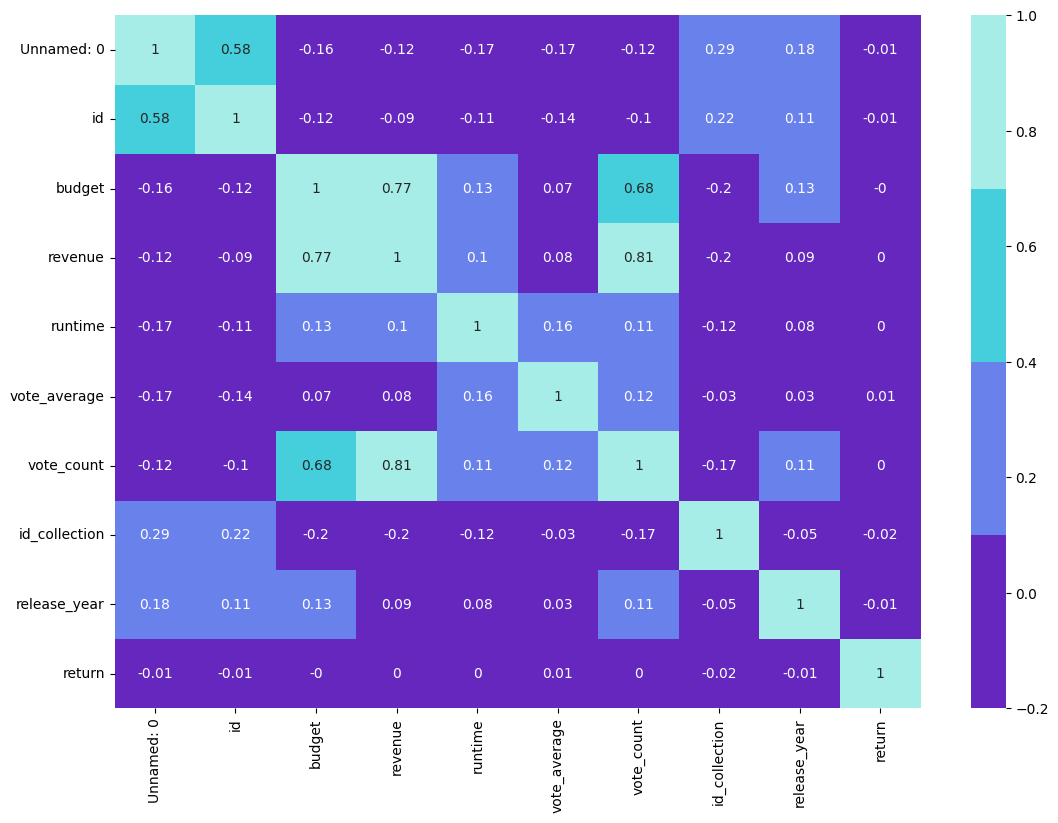

In [45]:
# UTILIZAMOS LA PALETA DE COLORES PAGINA colorhunt.co
dataf_numerico = Data_recomendación.select_dtypes(include=['number']) 
corr = dataf_numerico.corr().round(2)
plt.figure(figsize=(13,9))
custom_colors = ["#6527BE", "#6981EB", "#45CFDD", "#A7EDE7"]
sns.heatmap(data=corr, annot=True, cmap=custom_colors)
plt.show()

## Econtramos valores atipicos 

In [47]:
# VAMOS A OBTENER VALORES ATIPICOS POR EL METODO DEL RANGO
Q1 = dataf_numerico.quantile(0.25)
Q3 = dataf_numerico.quantile(0.75)
IQR = Q3 - Q1 
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (dataf_numerico < limite_inf) | (dataf_numerico > limite_sup)
valores_atipicos = dataf_numerico[mascaras]
valores_atipicos

,Unnamed: 0,id,budget,revenue,runtime,vote_average,vote_count,id_collection,release_year,return
0,NaN,NaN,30000000.0,373554033.0,NaN,NaN,5415.0,NaN,NaN,12.451801
1,NaN,NaN,65000000.0,262797249.0,NaN,NaN,2413.0,NaN,NaN,4.043035
2,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN
3,NaN,NaN,16000000.0,81452156.0,NaN,NaN,NaN,NaN,NaN,5.090760
4,NaN,NaN,NaN,76578911.0,NaN,NaN,173.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
45471,NaN,439050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Representacion Grafica o Histogramos de los datos

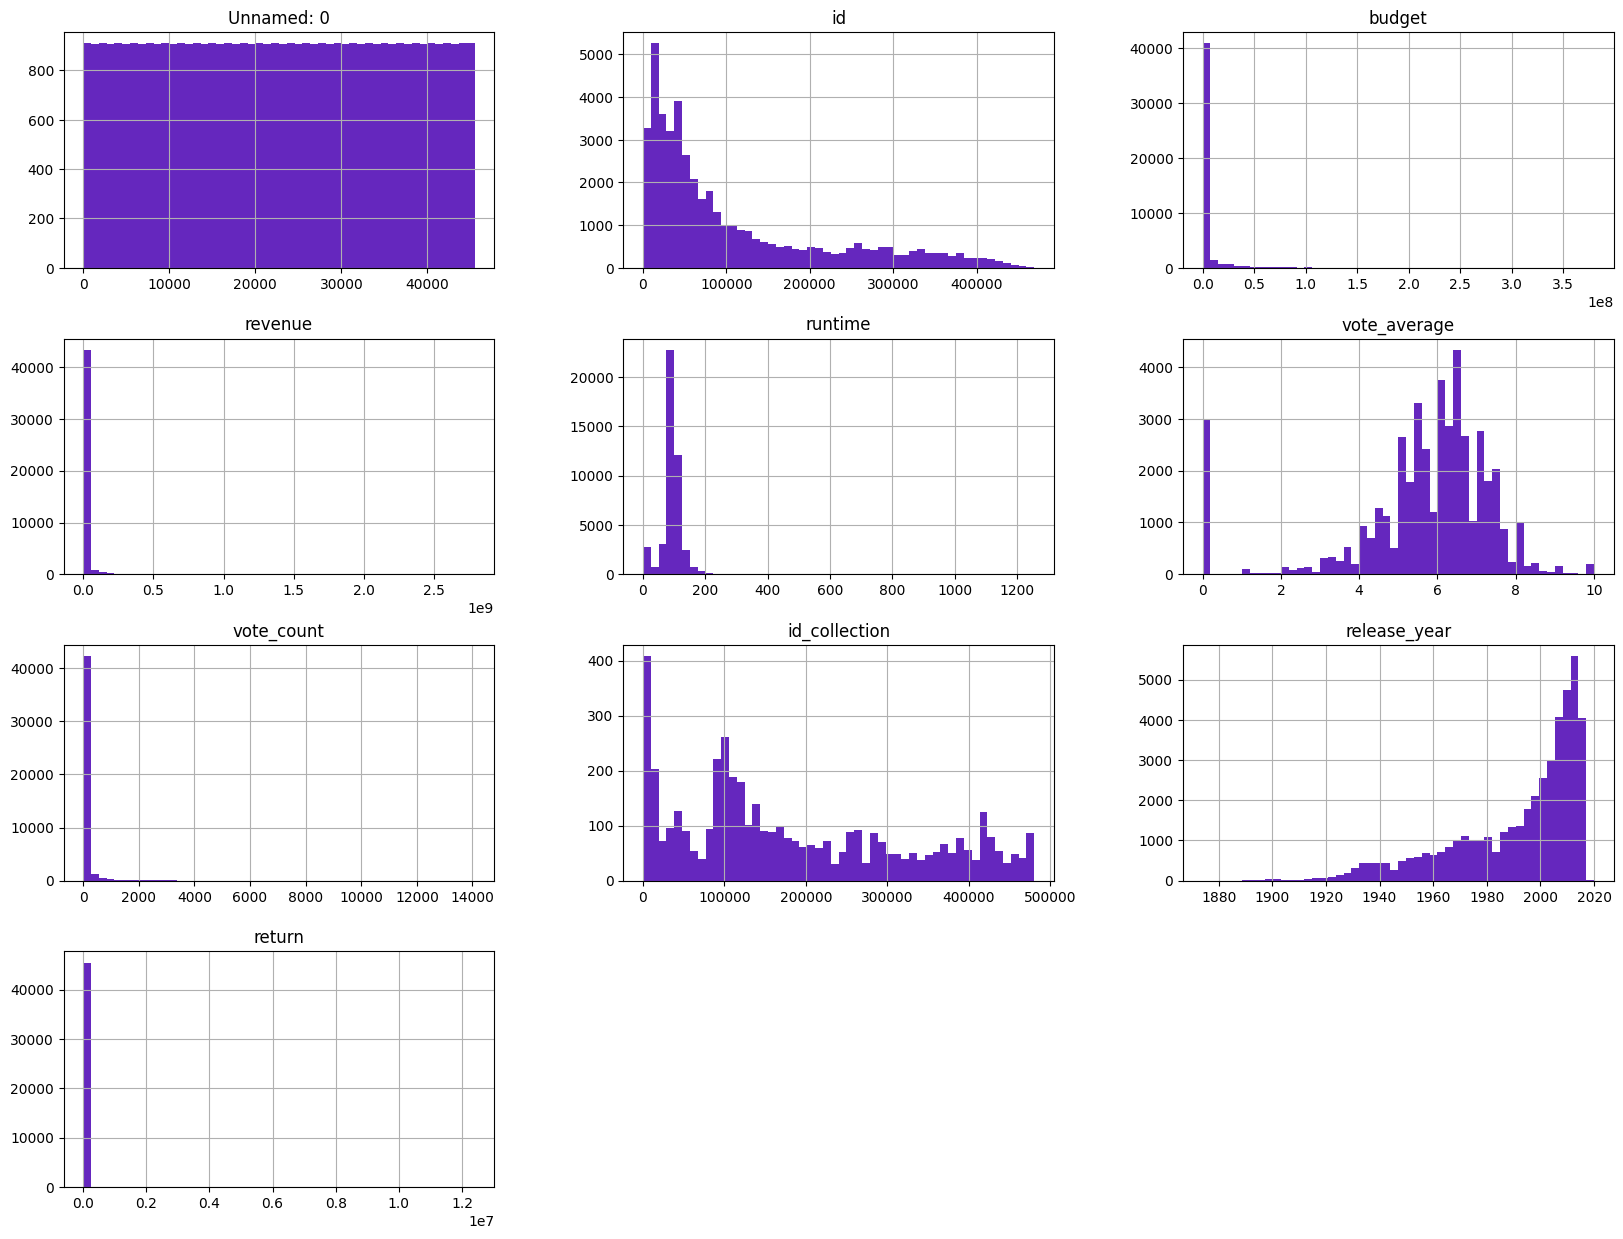

In [50]:
Data_recomendación.hist(bins = 50, figsize= (20,15), color="#6527BE")
plt.show()

## Creamos nubes de las palabras mas frecuentes

In [62]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk


In [63]:
# DESCARGAMOS LOS RECURSOS stopworks O PALABRAS VACIAS
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bety2022\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
# DESCARGAMOS TOKENIZADOR punkt DE nltk PARA PODER UTILIZAR LA FUNCION
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bety2022\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

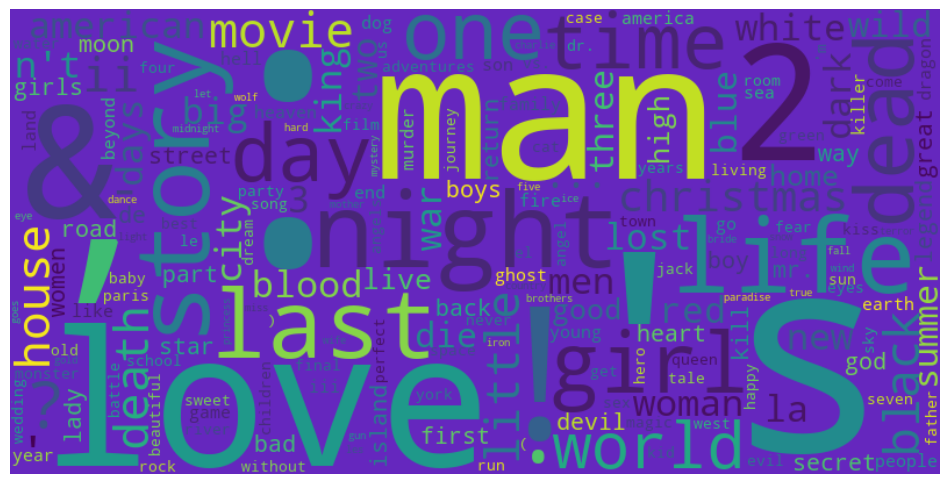

In [73]:
# GENERAMOS UNA NUBE DE LAS PALABRAS MAS FRECUENTES EN LA COLUMNA 'title'

def generate_wordcloud(texts):
    # OBTENEMOS LAS PREPOSICIONES EN INGLES
    stop_words = set(stopwords.words('english'))

    # COMBINAMOS TODOS LOS TEXTOS A UNA SOLA CADENA
    combined_text = ' '.join(str(text) for text in texts)

    # DIVIDIR O TOKENIZAR EL TEXTO EN PARTES MAS PEQUEÑAS
    words = word_tokenize(combined_text)

    # FILTRAR LAS PREPOSICIONES
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # CALCULAR LA FRECUENCIA DE APARICION DE CADA PALABRA
    freq_dist = nltk.FreqDist(filtered_words)

    # GENERAR NUBE DE PALABRAS A PARTIR DE LAS FRECUENCIAS DE PALABRAS ALMACENADAS
    wordcloud = WordCloud(width=800, height=400, background_color='#6527BE').generate_from_frequencies(freq_dist)

    # ESTE CODIGO GENERA UNA FIGURA QUE MUESTRA LA NUBE DE PALABRAS GENERADAS A PARTIR DE LAS FRECUENCIAS DE PALABRAS
    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# EXTRAE LOS VALORES DE LA COLUMNA 'title' DEL DATAFRAME Data_recomendación Y LO GUARDA EN UNA LISTA LLAMADA all_text
all_text = Data_recomendación['title'].tolist()

# APLICAR LA FUNCION AL TEXTO COMBINADO
generate_wordcloud(all_text)

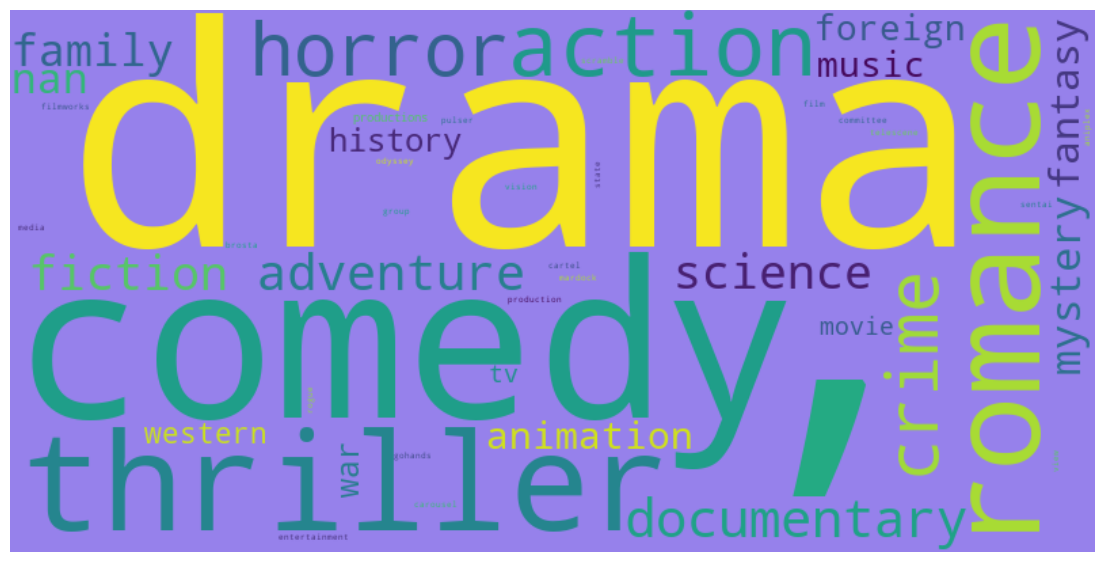

In [72]:
# NUBE DE PALABRAS DE LA COLUMNA 'name_genres' QUE INDICA LOS GENEROS DE LAS PELICULAS

def generate_wordcloud(texts):
    # OBTENEMOS LAS PREPOSICIONES EN INGLES
    stop_words = set(stopwords.words('english'))

    # COMBINAMOS TODOS LOS TEXTOS A UNA SOLA CADENA
    combined_text = ' '.join(str(text) for text in texts)

   # DIVIDIR O TOKENIZAR EL TEXTO EN PARTES MAS PEQUEÑAS
    words = word_tokenize(combined_text)

    # FILTRAR LAS PREPOSICIONES
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # CALCULAR LA FRECUENCIA DE APARICION DE CADA PALABRA
    freq_dist = nltk.FreqDist(filtered_words)

    # GENERAR NUBE DE PALABRAS A PARTIR DE LAS FRECUENCIAS DE PALABRAS ALMACENADAS
    wordcloud = WordCloud(width=800, height=400, background_color='#9681EB').generate_from_frequencies(freq_dist)

    # ESTE CODIGO GENERA UNA FIGURA QUE MUESTRA LA NUBE DE PALABRAS GENERADAS A PARTIR DE LAS FRECUENCIAS DE PALABRAS
    plt.figure(figsize=(14, 9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# EXTRAE LOS VALORES DE LA COLUMNA 'title' DEL DATAFRAME Data_recomendación Y LO GUARDA EN UNA LISTA LLAMADA all_text
all_text = Data_recomendación['name_genres'].tolist()

# APLICAR LA FUNCION AL TEXTO COMBINADO
generate_wordcloud(all_text)

## Graficos de dispersion

In [74]:
Data_recomendación.head(2)

,Unnamed: 0,id,character,name_actor,genres_actor,434,departament,job,name_director,budget,...,id_genres,name_genres,name_production,id_production,iso_countrie,name_countrie,iso_languague,name_languague,release_year,return
0,0,862,"Woody (voice),Buzz Lightyear (voice),Mr. Potat...","Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...","2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,2.0,1....",NaN,"Directing,Writing,Writing,Writing,Writing,Prod...",DirectorScreenplayScreenplayScreenplayScreenpl...,"John Lasseter,Joss Whedon,Andrew Stanton,Joel ...",30000000.0,...,"16.0,35.0,10751.0","Animation,Comedy,Family",Pixar Animation Studios,3.0,US,United States of America,en,English,1995.0,12.451801
1,1,8844,"Alan Parrish,Samuel Alan Parrish / Van Pelt,Ju...","Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...","2.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,1....",NaN,"Production,Writing,Sound,Directing,Editing,Pro...",Executive ProducerScreenplayOriginal Music Com...,"Larry J. Franco,Jonathan Hensleigh,James Horne...",65000000.0,...,"12.0,14.0,10751.0","Adventure,Fantasy,Family","TriStar Pictures,Teitler Film,Interscope Commu...","559.0,2550.0,10201.0",US,United States of America,"en,fr","English,Français",1995.0,4.043035


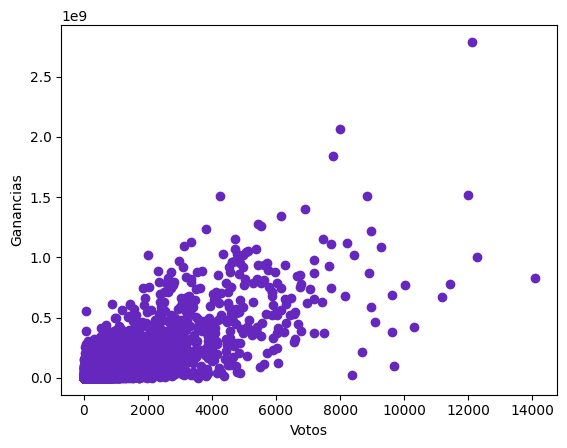

In [77]:
# GRAFICO DE DISPERSION DE LOS VOTOS VS GANANCIAS
x = Data_recomendación['vote_count']
y = Data_recomendación['revenue']
plt.xlabel('Votos')
plt.ylabel('Ganancias')
plt.scatter(x,y, color= '#6527BE')
plt.show()

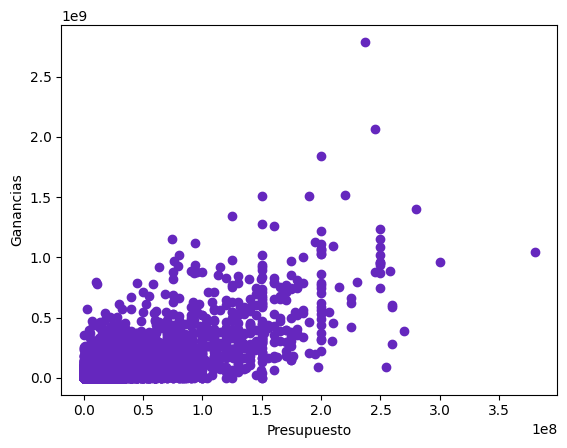

In [79]:
# GRAFICO DE DISPERSION DE LOS PRESUPUESTOS VS GANANCIAS
x = Data_recomendación['budget']
y = Data_recomendación['revenue']
plt.xlabel('Presupuesto')
plt.ylabel('Ganancias')
plt.scatter(x,y, color= '#6527BE')
plt.show()

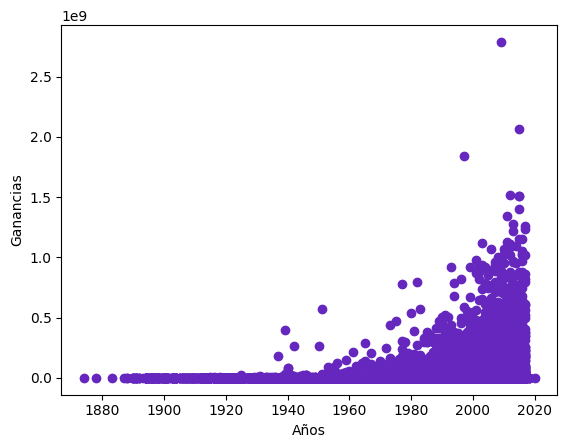

In [80]:
# GRAFICO DE DISPERSION DE LAS GANANCIAS POR AÑO
x = Data_recomendación['release_year']
y = Data_recomendación['revenue']
plt.xlabel('Años')
plt.ylabel('Ganancias')
plt.scatter(x,y, color= '#6527BE')
plt.show()

In [81]:
# VEMOS EL NOMBRE DE TODAS LAS COLUMNAS 
Data_recomendación.columns

Index(['Unnamed: 0', 'id', 'character', 'name_actor', 'genres_actor', '434',
       'departament', 'job', 'name_director', 'budget', 'id.1',
       'original_language', 'overview', 'popularity', 'release_date',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_collection', 'name_collection', 'id_genres',
       'name_genres', 'name_production', 'id_production', 'iso_countrie',
       'name_countrie', 'iso_languague', 'name_languague', 'release_year',
       'return'],
      dtype='object')